In [2]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal as mvn

In [3]:
import typing
from typing import Callable

## 2.1 Plot $y = -3x^2 + 72x + 70$.

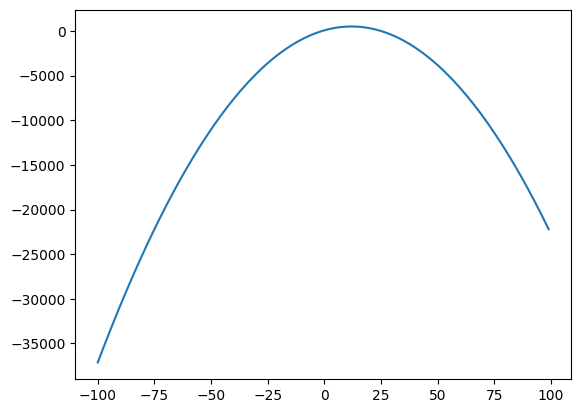

In [13]:
fn: Callable[[float],float] = lambda x : -3 * (x**2) + (72 * x) + 70
xs: np.ndarray = np.arange(-100, 100, 1)
ys: np.ndarray = fn(xs)
plt.plot(xs,ys)

## 2.3 Plot $f(x_1, x_2)$.

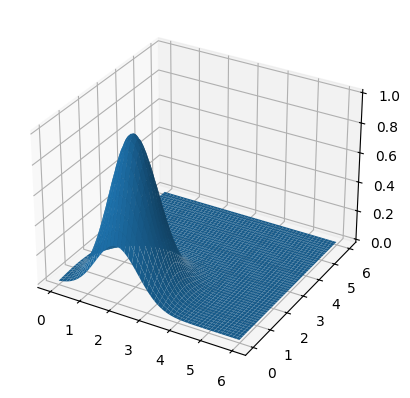

In [29]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fn: Callable[[float,float],float] = lambda x_1, x_2 : np.exp(-((x_1 - 2) ** 2) - ((x_2 - 1)**2))
x_1s: np.ndarray = np.arange(0, 6, 0.01)
x_2s: np.ndarray = np.arange(0, 6, 0.01)
x_1s, x_2s = np.meshgrid(x_1s, x_2s)
ys: np.ndarray = fn(x_1s,x_2s)
ax.plot_surface(x_1s,x_2s,ys)

## 3.1(a) Draw from joint distribution of $(S, W)$ and generate bivariate histogram.

Text(37.722222222222214, 0.5, 'W')

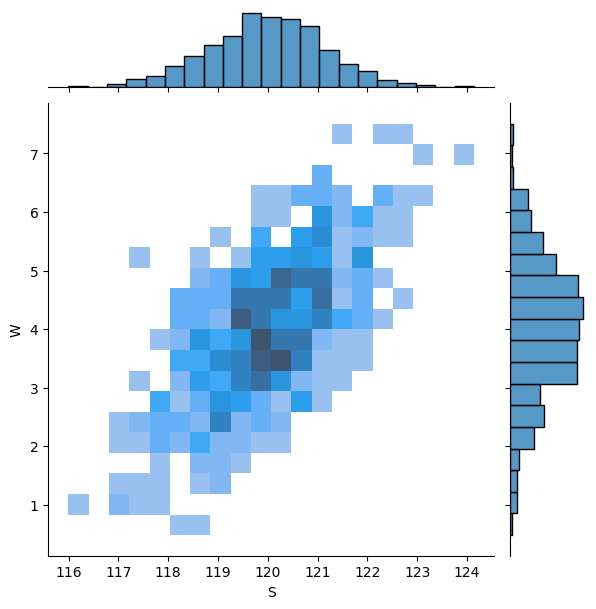

In [24]:
# Your code here
import seaborn as sns
sw_joint = mvn([120,4], [[1.5,1], [1, 1.5]])
samples = sw_joint.rvs(size=500, random_state=42)
# to be able to better observe distributions
sns.jointplot(x=samples[:,0],y=samples[:,1],bins=20,kind="hist")
plt.xlabel("S")
plt.ylabel("W")

## 3.2 Plot the joint PDFs at $S=118$ and $S=122$, varying $W$.

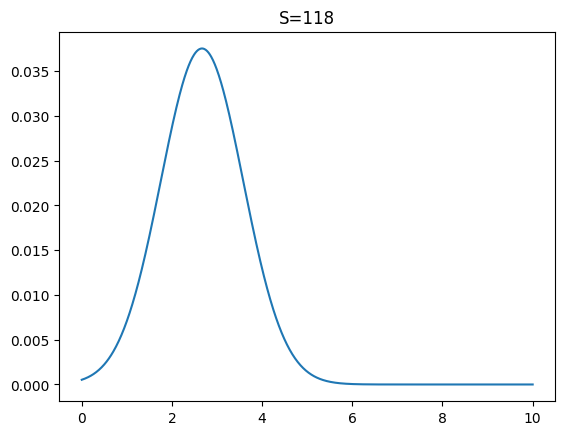

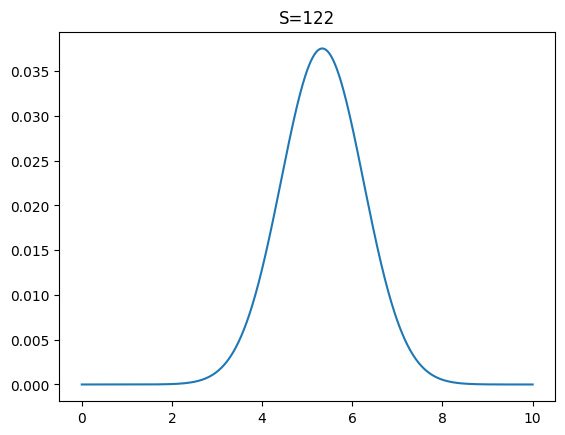

<Figure size 640x480 with 0 Axes>

In [23]:
def joint_pdf (s: np.ndarray, title: str = None) -> None:
    w: np.ndarray = np.linspace(0,10,1001)
    s,w=np.meshgrid(s,w)
    vals: np.ndarray = np.dstack((s,w))
    if np.shape(vals)[1] > 1:
        plt.contourf(s,w,sw_joint.pdf(vals))
    else:
        plt.plot(w,sw_joint.pdf(vals))
    plt.title(title)
    plt.show()
    plt.clf()

joint_pdf([118], "S=118")
joint_pdf([122], "S=122")

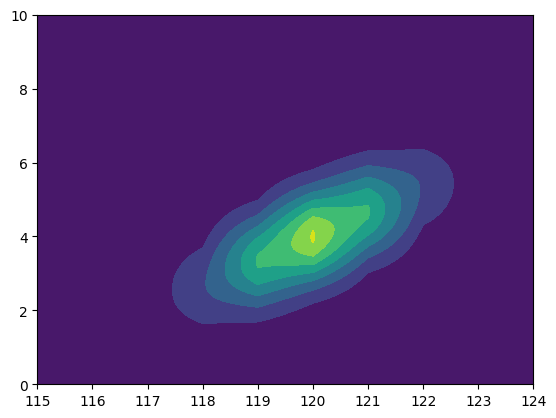

<Figure size 640x480 with 0 Axes>

In [186]:
# sanity check
joint_pdf(np.arange(115,125,1))
# .66 correlation looks right

## 3.5(a) Function to simulate draws from $T^{*}$.

In [231]:
def draw_from_tstar (size: int = 1) -> np.ndarray[float]:
    res = np.zeros(size)
    for i in range(size):
        rng = np.random.default_rng()
        npackages = np.sum(rng.poisson(3,24))
        swvals = sw_joint.rvs(npackages)
        swtot = np.sum(swvals,axis=0)
        noise = np.random.normal(loc=0,scale=np.sqrt(5),size=npackages)
        res[i] = 60 * npackages + .2*swtot[0] + .6*swtot[1] + np.sum(noise)
    return res

## 3.5(b) Empirically estimate the mean and standard deviation of $T^{*}$ by generating $1000$ samples.

empirical mean: 6160.408328358173
empirical sd: 734.3835866056636


(array([ 11.,  33., 136., 201., 239., 200., 123.,  37.,  16.,   4.]),
 array([4069.93570163, 4531.66179644, 4993.38789126, 5455.11398608,
        5916.84008089, 6378.56617571, 6840.29227052, 7302.01836534,
        7763.74446015, 8225.47055497, 8687.19664978]),
 <BarContainer object of 10 artists>)

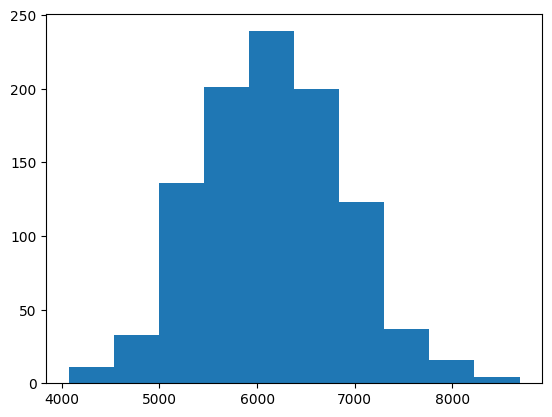

In [233]:
draws = draw_from_tstar(1000)
print(f"empirical mean: {np.mean(draws)}\nempirical sd: {np.std(draws)}")
plt.hist(draws)